# Purpose of the analysis
To evaluate how wages have been changing in relation to costs

# Import libraries

In [2]:
import pandas as pd
import matplotlib as plt
import numpy as np
import bls
from functools import reduce

# Read data from CSV

## Consumer Price Index of the US

In [3]:
# Using bls library to retrive data from the Bureau of Labor Statistics
cpi = bls.get_series('CUUR0000SA0',2002,2022, '9ed9d66c65a6496e93025b0d5ee86f34')
cpi.to_csv('cpi_data.csv')
cpi_data = pd.read_csv('cpi_data.csv')

# Rename columns
cpi_data.columns = 'Date', 'CPI'


## Wage and salary statistics of the US

In [6]:
 # Using bls library to retrive data from the Bureau of Labor Statistics
wages = bls.get_series('CIU2020000000000A',2002,2022, '9ed9d66c65a6496e93025b0d5ee86f34')
wages.to_csv('wages_data.csv')
wages_data = pd.read_csv('wages_data.csv')

# Rename columns
wages_data.columns = 'Date', 'Wages'
new_wages_data = wages_data
new_wages_data

,Date,Wages
0,2002Q1,3.5
1,2002Q2,3.6
2,2002Q3,3.1
3,2002Q4,2.6
4,2003Q1,2.9
...,...,...
79,2021Q4,5.0
80,2022Q1,5.0
81,2022Q2,5.7
82,2022Q3,5.2


# Clean data
Before comparing changes in both data sets, we'll need to solve two mismatches:

1. Different time formats: Wages data is quarterly, whereas CPI data is monthly

2. Different value formats: CPI values are meaured in points, while wage changes are presented as percentages

## Reformat CPI data to quarterly

In [13]:
# Change cpi data to quarterly
cpi_data['Date'] = cpi_data['Date'].str.replace('-03', 'Q1')
cpi_data['Date'] = cpi_data['Date'].str.replace('-06', 'Q2')
cpi_data['Date'] = cpi_data['Date'].str.replace('-09', 'Q3')
cpi_data['Date'] = cpi_data['Date'].str.replace('-12', 'Q4')

# Drop records for remaining months
newcpi_data = cpi_data[(cpi_data.Date.str.contains("-") == False)]
newcpi_data

,Date,CPI
2,2002Q1,178.800
5,2002Q2,179.900
8,2002Q3,181.000
11,2002Q4,180.900
14,2003Q1,184.200
...,...,...
239,2021Q4,278.802
242,2022Q1,287.504
245,2022Q2,296.311
248,2022Q3,296.808


## Convert pecentages to CPI values

In [14]:
newnum = cpi_data['CPI'][0]
def process_wages(x):
    global newnum
    if type(x) == str:
        return x
    elif x:
        newnum = (x / 400) * newnum + newnum
        return newnum
    else:
        return
newwages = new_wages_data.applymap(process_wages)
newwages

,Date,Wages
0,2002Q1,178.649625
1,2002Q2,180.257472
2,2002Q3,181.654467
3,2002Q4,182.835221
4,2003Q1,184.160776
...,...,...
79,2021Q4,294.850063
80,2022Q1,298.535689
81,2022Q2,302.789822
82,2022Q3,306.726090


# Merge data

In [15]:
merged_data = pd.merge(newcpi_data, newwages, on='Date')
merged_data

,Date,CPI,Wages
0,2002Q1,178.800,178.649625
1,2002Q2,179.900,180.257472
2,2002Q3,181.000,181.654467
3,2002Q4,180.900,182.835221
4,2003Q1,184.200,184.160776
...,...,...,...
79,2021Q4,278.802,294.850063
80,2022Q1,287.504,298.535689
81,2022Q2,296.311,302.789822
82,2022Q3,296.808,306.726090


# Plot data

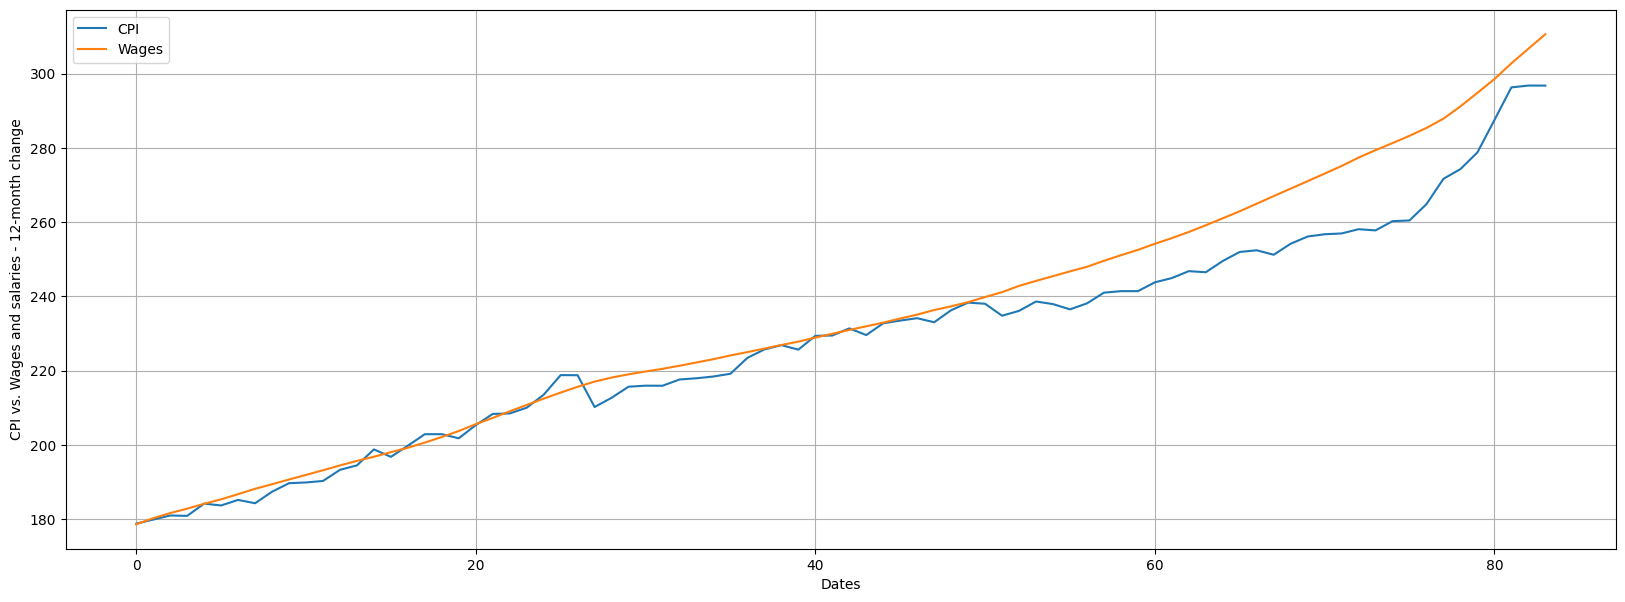

In [39]:
chart = merged_data.plot(kind = 'line', figsize = (20,7))
chart.set_ylabel('CPI vs. Wages and salaries - 12-month change')
chart.set_xlabel('Dates')
chart.grid()

# S&P 500 index

In [ ]:
sp500 = pd.read_csv('HistoricalPrices.csv')
sp500['Date'] = sp500['Date'].astype('datetime64')
sp500['Date'] = sp500['Date'].dt.strftime('%Y-%m-%d')
sp500['Date'] = sp500['Date'].str.replace('-03-31', 'Q1')
sp500['Date'] = sp500['Date'].str.replace('-09-30', 'Q3')
sp500['Date'] = sp500['Date'].str.replace('-06-30', 'Q2')
sp500['Date'] = sp500['Date'].str.replace('-12-31', 'Q4')
sp500 = sp500[(sp500.Date.str.contains('Q') == True)]

rename_sp500 = sp500.rename(columns = lambda x: x.strip())
sp = rename_sp500[['Date', 'Close']]
sp = sp.iloc[::-1]
sp

# Merge CPI, Wages and SP500 Index

Text(0, 0.5, 'S&P Index quotes by month')

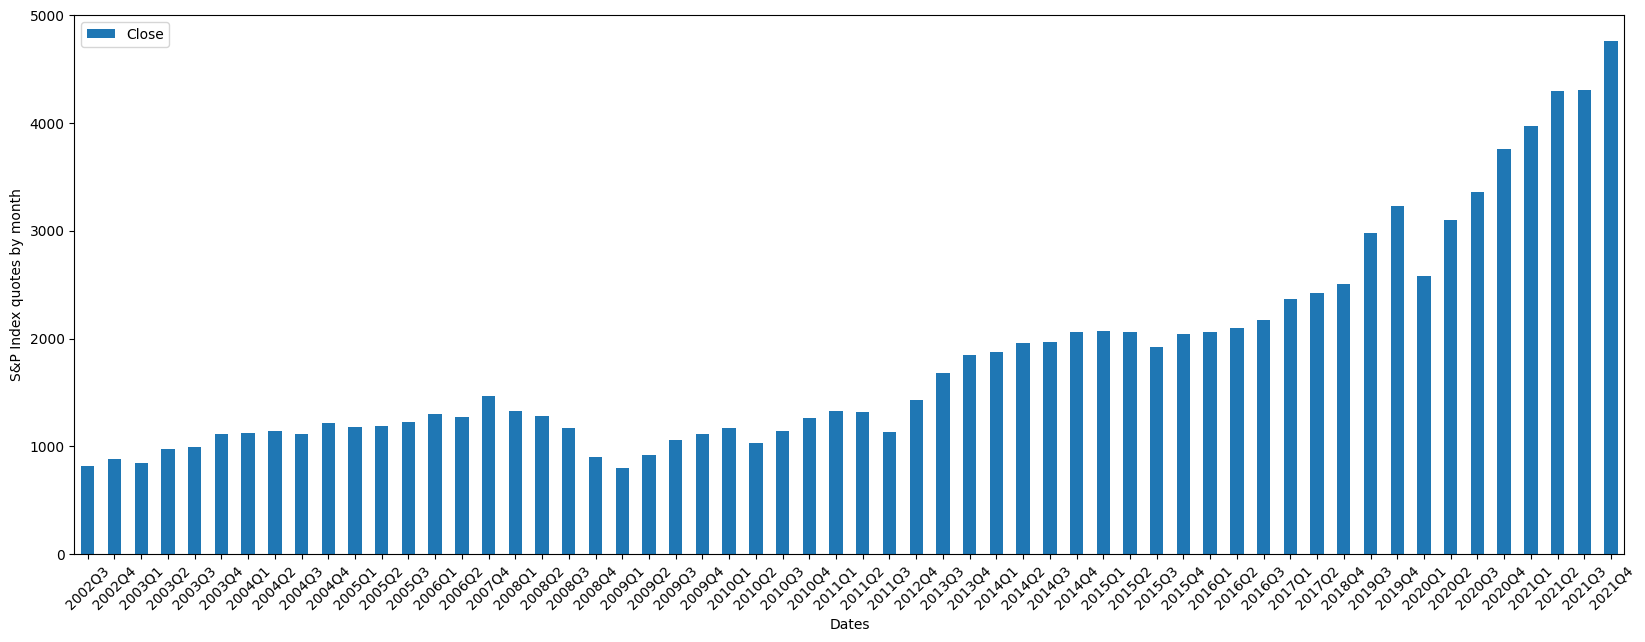

In [158]:
dfs = [newcpi_data, newwages, sp]
df_triple = reduce(lambda left,right: pd.merge(left,right, on='Date'), dfs)
chart2 = sp.plot(kind = 'bar', figsize = (20,7))
chart2.set_xticklabels(sp.Date, rotation = 45)
chart2.set_xlabel('Dates')
chart2.set_ylabel('S&P Index quotes by month')

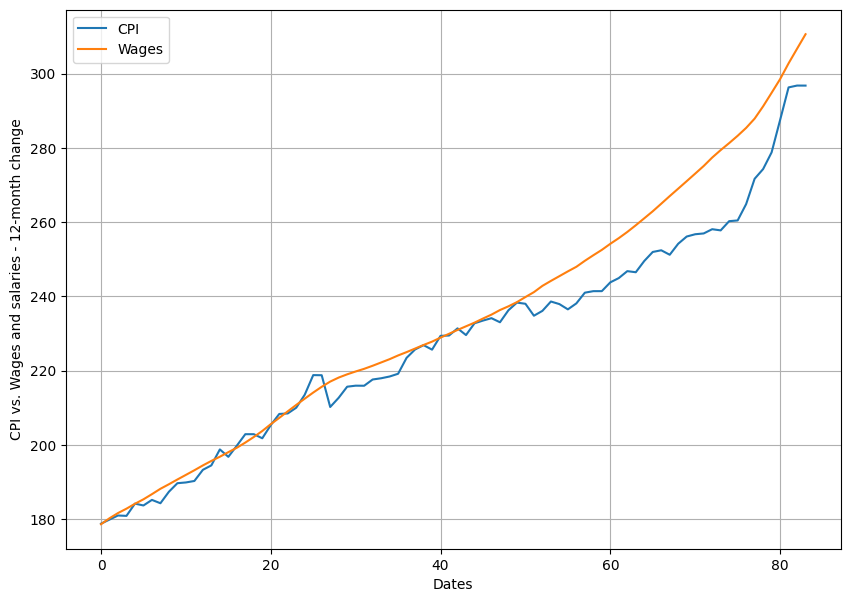

In [150]:
chart = merged_data.plot(kind = 'line', figsize = (10,7))
chart.set_ylabel('CPI vs. Wages and salaries - 12-month change')
chart.set_xlabel('Dates')
chart.grid()